# IPython demonstration of the NBOW2 model 

This IPython notebook serves as an interative demonstration of the NBOW2 model with training on the [Rotten Tomoatoes (RT) sentiment polarity dataset](https://www.cs.cornell.edu/people/pabo/movie-review-data/). You can train the NBOW2 model (1 of the 10-fold at a time) and check the classification accuracy (on that fold).
There is also a visulization demonstration of the NBOW2 model trained on [20 Newsgroup dataset](http://qwone.com/~jason/20Newsgroups/) used for reporting topic classification results.

### Train
You can simply run the two lines of code below to train the model. For purpose of demonstration the original IPython notebook shows the training output with default settings.

### Visualize
More interestingly you can visulaize what the NBOW2 model has learned by (a) plotting the t-SNE embeddings of the word vectors learned by the NBOW2 model (b) visulaizing the documents from the test set. (It is not necessary to train the models and you can [**skip to visualization**](#visualization) of the pre-trained models made available with this notebook.) 

### Change Settings
It is possible to change and try different hyper-parameter seetings. For this check the complete list of arguments of the *train_mlp()* function in the [`src/rt_nbow2.py`](https://github.com/mranahmd/nbow2-text-class/blob/master/src/rt_nbow2.py) python script. For trying different hyper-parameters in this notebook demo you can simply change the arguments in the code below.



In [20]:
import rt_nbow2

rt_nbow2.train_mlp(max_epochs=50, input_path="../data/rt/", outDir="../models/tmp/", fold=0)


model options {'input_path': '../data/rt/', 'validFreq': 300, 'batch_size': 32, 'num_anch_vec': 1, 'fold': 0, 'word_dropout': 0.3, 'lrate': 0.0001, 'max_epochs': 50, 'dispFreq': 50, 'optimizer': <function adadelta at 0x12891a500>, 'patience': 10, 'test_batch_size': 32, 'dim_proj': 300, 'maxlen': 500, 'saveto': 'rt_nbow2_fold0-model.npz', 'random_init': 1, 'saveFreq': 300, 'outDir': '../models/tmp/'}
Loading data
fold 0 
9596 train examples
1066 test examples
Building model
Optimization
('Staring Error: Test ', 0.46716697936210128)
Epoch  0 Update  50 Cost  0.693735287029
Epoch  0 Update  100 Cost  0.690388674488
Epoch  0 Update  150 Cost  0.69648991869
Epoch  0 Update  200 Cost  0.692551226001
Epoch  0 Update  250 Cost  0.691958476489
Epoch  0 Update  300 Cost  0.694300670986
Saving... Done
('Train ', 0.5, 'Test ', 0.5)
Seen 9596 samples
Epoch  1 Update  350 Cost  0.700580800538
Epoch  1 Update  400 Cost  0.692836106148
Epoch  1 Update  450 Cost  0.6985523603
Epoch  1 Update  500 Cost 


------------------------------------------------------------------
Training took 2422.7s

(0.011254689453939148, 0.22232645403377116)

## Visualizing what the NBOW2 model learns

We can draw a 2-dimensional t-SNE plot of the word vectors learned by the NBOW2 model and show the word importance with different color codes. 

Calculating/Loading t-SNE ...
Plotting t-SNE ...


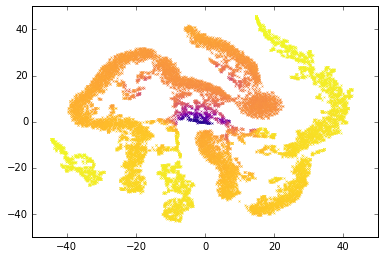

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import drawFns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

outDir="../models/tmp/"
modelFile="../models/tmp/rt_nbow2_fold0-model.npz"
NBOW2Flag = True
print "Calculating/Loading t-SNE ..."
#drawFns.getTsne(modelFile, outDir, NBOW2Flag)     # (un-)comment if t-SNE is (not) computed
reduced_vecs = numpy.loadtxt(outDir + "/tsne", dtype = numpy.float32)

print "Plotting t-SNE ..."

if NBOW2Flag:
    wts = numpy.loadtxt(outDir + "/wts", dtype = numpy.float32)
    f = plt.figure()
    ax = f.add_axes([0.1,0.1,0.8,0.8])
    for i in range(len(reduced_vecs)):
        ax.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='x', color=cm.plasma(wts[i]), markersize=2)
else:
    f = plt.figure()
    ax = f.add_axes([0.1,0.1,0.8,0.8])
    for i in range(len(reduced_vecs)):
        ax.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='x', color='k', markersize=2)        

<a id='visualization'></a>

If you looked at individual points in the different color regions you will get a better feel of word importance learned by the NBOW2 model. 

The following figure from the paper illustrates some example words carrying different degree of sentiment information (for given task and dataset) placed together in different regions. 
![RT-NBOW2](../models/tmp/rt-nbow2.png)

### Word importance at document level
It is also interesting to print out the RT movie documents with words carrying the information of their importance weights

In [96]:
import drawFns
import numpy
from IPython.core.display import display, HTML

docNum = numpy.random.randint(1, high=1000, size=1)
htmlTxt = drawFns.printDoc("../models/tmp/rt_nbow2_fold0.test-wNwts", docNum)
print "Fold 0 test document " + str(docNum) + " \n"
display(HTML(htmlTxt))

Fold 0 test document [745] 



## 20 Newsgroup examples

And before finishing, we can also check examples from the [20 Newsgroup topic classification dataset](http://qwone.com/~jason/20Newsgroups/).

In [46]:
import drawFns
import numpy
from IPython.core.display import display, HTML

docNum = numpy.random.randint(1, high=7528, size=1)
htmlTxt = drawFns.printDoc("../models/tmp2/20ng-test-wNwts", docNum, numWordsToShow=20)
print "Test document " + str(docNum) + " \n"
display(HTML(htmlTxt))

Test document [1935] 

